In [189]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression

sns.set()
warnings.filterwarnings('ignore')

In [190]:
company = pd.read_csv("companies.csv")
comp = pd.read_csv("companies.csv")
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [191]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [192]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [193]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [194]:
#Type your code here!
company = company.drop(columns=['region', 'city','state_code'])
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [195]:
#Type your code here!
company=company.drop(columns=['id','Unnamed: 0.1','entity_type','entity_id','parent_id','created_by','created_at','updated_at'])
company

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,Webgility,webgility,/company/webgility,ecommerce,operating,2007-01-01,NaN,webgility.com,http://www.webgility.com,webgility,...,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,FohBoh,fohboh,/company/fohboh,public_relations,operating,2007-11-01,NaN,fohboh.com,http://www.fohboh.com,fohboh,...,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,CSC,csc,/company/csc,consulting,operating,1959-01-01,NaN,csc.com,http://www.csc.com,CSCNews,...,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,Top-candidate,top candidate,/company/top-candidate,search,operating,2008-07-01,NaN,top-candidate.com,http://www.top-candidate.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [196]:
#Type your code here!
company=company.drop(columns=['domain','homepage_url','twitter_username','logo_url','logo_width','logo_height','short_description','description','overview','tag_list','name','normalized_name','permalink','invested_companies'])
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


#### 1.d. Delete duplicate values if found any.

In [197]:
# Delete duplicate values if found any.
#Type your code here!
company.duplicated().sum()

87089

In [198]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!
duplicate=company[company.duplicated()]
duplicate

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
79,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
114,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
132,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196533,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196534,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196535,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196536,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# Let's delete all the duplicate values
#Type your code here!
company.drop_duplicates(inplace=True)

In [200]:
# check if any left
#Type your code here!
company.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [201]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [202]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
percent_missing=company.isnull().sum()/len(company)*100
missing_value_df = pd.DataFrame({'column_name': company.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False,inplace=True)
missing_value_df.sort_values

<bound method DataFrame.sort_values of                              column_name  percent_missing
ROI                                  ROI        99.336768
first_investment_at  first_investment_at        97.947270
last_investment_at    last_investment_at        97.947270
investment_rounds      investment_rounds        97.943616
closed_at                      closed_at        97.607433
funding_total_usd      funding_total_usd        74.546883
first_funding_at        first_funding_at        71.248995
last_funding_at          last_funding_at        71.248995
funding_rounds            funding_rounds        71.067200
first_milestone_at    first_milestone_at        48.740225
last_milestone_at      last_milestone_at        48.740225
milestones                    milestones        48.740225
relationships              relationships        31.428598
lat                                  lat        25.910802
lng                                  lng        25.910802
founded_at                    fou

In [203]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!
columns=['ROI','first_investment_at','last_investment_at','investment_rounds']
company.drop(columns,axis=1,inplace=True)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [204]:
#Type your code here!
company['status'].isna().sum()

0

In [205]:
#Type your code here!
company['country_code'].isna().sum()

24870

In [206]:
#Type your code here!
company[['category_code','founded_at']].isnull().sum()

category_code    12230
founded_at       26913
dtype: int64

In [207]:
# Since we can see only nan values so et's check how much of rows has nan values.
#Type your code here!
company[['status','country_code','category_code','founded_at']].isna().sum()

status               0
country_code     24870
category_code    12230
founded_at       26913
dtype: int64

In [208]:
#Type your code here!
company.dropna(subset=['status','country_code','category_code','founded_at'],inplace=True)

In [209]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

Text(0.5, 1.0, 'Funding_Total_USD Boxplot')

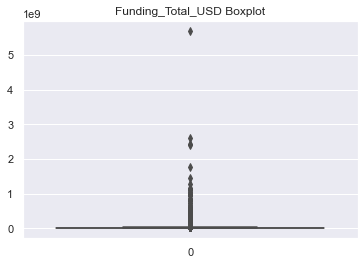

In [210]:
#Type your code here!

sns.boxplot(data=company['funding_total_usd'])
plt.title("Funding_Total_USD Boxplot")

Text(0.5, 1.0, 'Funding_rounds Boxplot')

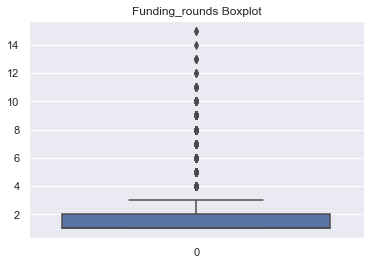

In [211]:
#Type your code here!
sns.boxplot(data=company['funding_rounds'])
plt.title("Funding_rounds Boxplot")

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [212]:
# For funding_total_usd
#Type your code here!
Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_rounds
#Type your code here!
Q1_FR = company.funding_rounds.quantile(0.25)
Q3_FR = company.funding_rounds.quantile(0.75)
IQR_FR = Q3_FR - Q1_FR
print(f"IQR of funding_rounds is: {IQR_FR}")

IQR of funding_total_usd is: 11488962.0

IQR of funding_rounds is: 1.0


#### 2.b.1. Find the Upper and Lower limit

In [213]:
# For funding_total_usd
#Type your code here!
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")


# For funding_rounds
lower_limit_FR = Q1_FR - 1.5*IQR_FR
upper_limit_FR = Q3_FR + 1.5*IQR_FR
print("funding_rounds")
print(f"lower limit is: {lower_limit_FR}")
print(f"upper limit is: {upper_limit_FR}")


funding_total_usd
lower limit is: -16722405.0
upper limit is: 29233443.0

funding_rounds
lower limit is: -0.5
upper limit is: 3.5


#### 2.b.1.  Find outliers

In [214]:
# For funding_total_usd
#Type your code here!
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(funding_total_usd_outliers.shape)

# For funding_rounds
funding_rounds_outliers=company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)]
print(funding_rounds_outliers.shape)

(2561, 15)
(2182, 15)


#### 2.b.1. Drop the outliers

In [215]:
# For funding_total_usd
#Type your code here!
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)


# For funding_rounds
company.drop(company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)].index,inplace=True)


In [216]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008-01-01,NaN,USA,NaN,NaN,NaN,NaN,2008-01-01,2008-01-01,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [217]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [218]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# # first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# # last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,NaN,USA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [219]:
# 1. category_code
#Type your code here!
company['category_code'].unique()

array(['advertising', 'cleantech', 'web', 'games_video', 'mobile',
       'software', 'network_hosting', 'consulting', 'finance',
       'education', 'medical', 'manufacturing', 'enterprise', 'other',
       'ecommerce', 'public_relations', 'hardware', 'search', 'analytics',
       'news', 'government', 'security', 'biotech', 'photo_video',
       'travel', 'health', 'semiconductor', 'social', 'legal',
       'transportation', 'hospitality', 'sports', 'nonprofit', 'fashion',
       'messaging', 'music', 'automotive', 'design', 'real_estate',
       'local', 'pets', 'nanotech'], dtype=object)

In [220]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
#Type your code here!
company['category_code'].value_counts().sort_values()

government             21
nanotech               32
pets                   36
automotive             99
design                106
nonprofit             114
transportation        126
sports                165
music                 179
messaging             180
photo_video           196
local                 197
real_estate           220
hospitality           267
fashion               271
manufacturing         276
news                  282
travel                330
semiconductor         360
medical               361
legal                 362
health                601
security              612
finance               638
social                645
analytics             646
cleantech             798
search                976
education            1149
network_hosting      1254
hardware             1434
public_relations     1561
biotech              2006
enterprise           2472
consulting           2780
games_video          2789
advertising          3575
mobile               3700
other       

In [221]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.
#Type your code here!
category_others_index = company['category_code'].value_counts()[15:].index

In [222]:
#Type your code here!
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')
print("Unique no of values in category_code:",company['category_code'].nunique())
company['category_code'].value_counts()

Unique no of values in category_code: 15


other               12820
software            10888
web                  7752
ecommerce            4831
mobile               3700
advertising          3575
games_video          2789
consulting           2780
enterprise           2472
biotech              2006
public_relations     1561
hardware             1434
network_hosting      1254
education            1149
search                976
Name: category_code, dtype: int64

In [223]:
# Let's check if we've more than 15 columns
#Type your code here!
company.shape[1]

15

In [224]:
# One-hot encoding to category_code
#Type your code here!
# Create an instance of the encoder
encoder = OneHotEncoder()

# Reshape the input array to have 2D shape
category_code_2d = np.array(company['category_code']).reshape(-1, 1)

# Fit the encoder to the categorical column
encoder.fit(category_code_2d)

# Transform the categorical column
encoded = encoder.transform(category_code_2d)

In [225]:
# Concatenate category with company dataset
#Type your code here!
# Get the list of unique category values
categories = encoder.categories_[0]

# Create a list of column names for the one-hot encoded matrix
column_names = ['category_' + str(cat) for cat in categories]

# Convert the encoded matrix to a pandas DataFrame with column names
encoded_df = pd.DataFrame(encoded.toarray(), columns=column_names)
company_fe = pd.concat([company, encoded_df], axis=1)
company_fe

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,category_enterprise,category_games_video,category_hardware,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_software,category_web
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007.0,NaN,USA,NaN,NaN,NaN,NaN,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196549,public_relations,operating,2007.0,NaN,USA,2008.0,2008.0,1.0,750000.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196550,consulting,operating,1959.0,NaN,USA,NaN,NaN,NaN,NaN,2012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196551,search,operating,2008.0,NaN,USA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
# Since, We've added the encoded category_columns, let's delete original category_code
#Type your code here!
company_fe.drop('category_code', axis=1, inplace=True)
company_fe

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,category_enterprise,category_games_video,category_hardware,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_software,category_web
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,NaN,USA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196549,operating,2007.0,NaN,USA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196550,operating,1959.0,NaN,USA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196551,operating,2008.0,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's encode 'country' column now.

In [227]:
# 1. country_code
#Type your code here!
company_fe['country_code'].unique()

array([nan, 'MAR', 'IND', 'USA', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'ARG',
       'CHE', 'UKR', 'ITA', 'NZL', 'CZE', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI', 'DOM',
       'MDV', '

In [228]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

#Type your code here!
company_fe['country_code'].value_counts().sort_values()

SDN        1
ARA        1
GLP        1
CIV        1
RWA        1
       ...  
DEU     1358
CAN     2609
IND     2985
GBR     4959
USA    33844
Name: country_code, Length: 165, dtype: int64

In [229]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
#Type your code here!
country_others_index =company_fe['country_code'].value_counts()[10:].index

In [230]:
#Type your code here!
company_fe['country_code'] = company_fe['country_code'].replace(to_replace=country_others_index,value='other')
print("Unique no of values in category_code:",company_fe['country_code'].nunique())
country_others_index.value_counts()

Unique no of values in category_code: 11


IRL    1
BIH    1
ZWE    1
BLZ    1
UZB    1
      ..
URY    1
SVN    1
GHA    1
SVK    1
SDN    1
Length: 155, dtype: int64

In [231]:
#Type your code here!
company_fe['country_code'].value_counts()

USA      33844
other     9682
GBR       4959
IND       2985
CAN       2609
DEU       1358
FRA       1226
AUS       1027
ESP        880
ISR        764
NLD        653
Name: country_code, dtype: int64

In [232]:
# One-hot encoding to category_code
#Type your code here!
# Create an instance of the encoder
encoder = OneHotEncoder()

# Reshape the input array to have 2D shape
country_code_2d = np.array(company_fe['country_code']).reshape(-1, 1)

# Fit the encoder to the categorical column
encoder.fit(country_code_2d)

# Transform the categorical column
encoded = encoder.transform(country_code_2d)

In [233]:
# Concatenate category with company dataset
#Type your code here!
# Get the list of unique category values
categories = encoder.categories_[0]

# Create a list of column names for the one-hot encoded matrix
column_names = ['country_' + str(cat) for cat in categories]

# Convert the encoded matrix to a pandas DataFrame with column names
encoded_df = pd.DataFrame(encoded.toarray(), columns=column_names)
company_fe_1 = pd.concat([company_fe, encoded_df], axis=1)
company_fe_1

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,NaN,USA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196549,operating,2007.0,NaN,USA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196550,operating,1959.0,NaN,USA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196551,operating,2008.0,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# Since, We've added the encoded country_code , let's delete original category_code
#Type your code here!
company_fe_1.drop('country_code', axis=1, inplace=True)
company_fe_1

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,NaN,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196549,operating,2007.0,NaN,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196550,operating,1959.0,NaN,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196551,operating,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [235]:
#Type your code here!
def compute_is_Closed(row):
    if row['status']=='operating' or row['status']=='ipo':
        return 1
    else:
        return 0
company_fe_1['isClosed'] = company.apply(compute_is_Closed, axis=1)
company_fe_1

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan,isClosed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,NaN,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196549,operating,2007.0,NaN,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196550,operating,1959.0,NaN,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196551,operating,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [236]:
#Type your code here!
company_fe_1['isClosed'].value_counts()

1.0    54981
0.0     5006
Name: isClosed, dtype: int64

In [237]:
#Type your code here!
company_fe_1.head()

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan,isClosed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [238]:
#Type your code here!
company_fe_1['closed_at'].unique()

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2001., 2006.,
       1963., 1991., 2005., 2007., 1998., 2004., 1997., 2000.])

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [239]:
#Type your code here!
# replace values in 'closed_at' column based on values in 'status' column
#company_fe_1.loc[company_fe_1['status'].isin(['operating', 'ipo']), 'closed_at'] = 2021
#company_fe_1.loc[company_fe_1['status'].isin(['acquired', 'closed']), 'closed_at'] = 0
company_fe_1['closed_at']=(np.where((company_fe_1['status']=='operating')|(company_fe_1['status']=='ipo'),2021,company_fe_1['closed_at']))
company_fe_1['closed_at']=(np.where((company_fe_1['status']=='acquired')|(company_fe_1['status']=='closed'),0,company_fe_1['closed_at']))

In [240]:
#Type your code here!
#company_fe_1['status'].isna().sum()
company_fe_1.dropna(axis=0, subset=['closed_at'], inplace=True)

In [241]:
#Type your code here!
company_fe_1

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan,isClosed
5,operating,2007.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,operating,2008.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12,operating,2008.0,2021.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13,acquired,2007.0,0.0,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,operating,2008.0,2021.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,2021.0,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196549,operating,2007.0,2021.0,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196550,operating,1959.0,2021.0,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196551,operating,2008.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [242]:
closed_at=company_fe_1['closed_at']
founded_at=company_fe_1['founded_at']

In [243]:
#Type your code here!
# convert founded_date and closed_date to datetime objects
#company_fe_1['founded_at'] = pd.to_datetime(company_fe_1['founded_at'])
#company_fe_1['closed_at'] = pd.to_datetime(company_fe_1['closed_at'], errors='coerce')

# calculate age in days
#company_fe_1['active_days'] = (company_fe_1['closed_at'] - company_fe_1['founded_at']).dt.days

active_days=365*((closed_at).astype('float64')-(founded_at).astype('float64'))
company_fe_1['active_Days']=active_days
index_name=company_fe_1['active_Days'].sort_values().head(68).index
company_fe_1.drop(index_name,inplace=True)
company_fe_1['active_Days']

5           5110.0
6           4745.0
12          4745.0
13       -732555.0
15          4745.0
            ...   
196548      5110.0
196549      5110.0
196550     22630.0
196551      4745.0
196552      5110.0
Name: active_Days, Length: 59919, dtype: float64

#### 2.b.iii. Then, delete the closed_at column.

In [244]:
#Type your code here!
company_fe_1.drop('closed_at',axis=1,inplace=True)
company_fe_1

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan,isClosed,active_Days
5,operating,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5110.0
6,operating,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4745.0
12,operating,2008.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4745.0
13,acquired,2007.0,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-732555.0
15,operating,2008.0,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5110.0
196549,operating,2007.0,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5110.0
196550,operating,1959.0,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22630.0
196551,operating,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4745.0


### Remove the null vaues with the mean value in 'Numerical Data'

In [245]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,NaN,USA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [246]:
#Type your code here!
company_fe_1['first_funding_at'].fillna((company_fe_1['first_funding_at'].mean()),inplace=True)
company_fe_1['last_funding_at'].fillna((company['last_funding_at'].mean()),inplace=True)

company_fe_1['funding_rounds'].fillna((company['funding_rounds'].mean()),inplace=True)

company_fe_1['funding_total_usd'].fillna((company['funding_total_usd'].mean()),inplace=True)

company_fe_1['first_milestone_at'].fillna((company['first_milestone_at'].mean()),inplace=True)

company_fe_1['last_milestone_at'].fillna((company['last_milestone_at'].mean()),inplace=True)

company_fe_1['milestones'].fillna((company['milestones'].mean()),inplace=True)

company_fe_1['relationships'].fillna((company['relationships'].mean()),inplace=True)

company_fe_1['lat'].fillna((company['lat'].mean()),inplace=True)

company_fe_1['lng'].fillna((company['lng'].mean()),inplace=True)

In [247]:
company_fe_1

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_FRA,country_GBR,country_IND,country_ISR,country_NLD,country_USA,country_other,country_nan,isClosed,active_Days
5,operating,2007.0,2010.275281,2010.838703,1.42538,4.561781e+06,2009.506893,2010.083768,1.356845,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5110.0
6,operating,2008.0,2010.275281,2010.838703,1.42538,4.561781e+06,2009.506893,2010.083768,1.356845,3.891288,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4745.0
12,operating,2008.0,2010.275281,2010.838703,1.42538,4.561781e+06,2008.000000,2008.000000,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4745.0
13,acquired,2007.0,2008.000000,2008.000000,1.00000,5.000000e+06,2008.000000,2012.000000,3.000000,14.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-732555.0
15,operating,2008.0,2010.275281,2010.838703,1.42538,4.561781e+06,2008.000000,2008.000000,1.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007.0,2010.275281,2010.838703,1.42538,4.561781e+06,2013.000000,2013.000000,2.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5110.0
196549,operating,2007.0,2008.000000,2008.000000,1.00000,7.500000e+05,2013.000000,2013.000000,1.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5110.0
196550,operating,1959.0,2010.275281,2010.838703,1.42538,4.561781e+06,2012.000000,2013.000000,3.000000,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22630.0
196551,operating,2008.0,2010.275281,2010.838703,1.42538,4.561781e+06,2009.506893,2010.083768,1.356845,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4745.0


In [248]:
# First let's check how much of rows has nan values and drop them.
#Type your code here!
company_fe_1.isna().sum()

status                           0
founded_at                       0
first_funding_at                 0
last_funding_at                  0
funding_rounds                   0
funding_total_usd                0
first_milestone_at               0
last_milestone_at                0
milestones                       0
relationships                    0
lat                              0
lng                              0
category_advertising         38627
category_biotech             38627
category_consulting          38627
category_ecommerce           38627
category_education           38627
category_enterprise          38627
category_games_video         38627
category_hardware            38627
category_mobile              38627
category_network_hosting     38627
category_other               38627
category_public_relations    38627
category_search              38627
category_software            38627
category_web                 38627
country_AUS                  31653
country_CAN         

In [249]:
#Type your code here!
company_fe_1.dropna(inplace=True)

In [250]:
#Type your code here!
company_fe_1.isna().sum()

status                       0
founded_at                   0
first_funding_at             0
last_funding_at              0
funding_rounds               0
funding_total_usd            0
first_milestone_at           0
last_milestone_at            0
milestones                   0
relationships                0
lat                          0
lng                          0
category_advertising         0
category_biotech             0
category_consulting          0
category_ecommerce           0
category_education           0
category_enterprise          0
category_games_video         0
category_hardware            0
category_mobile              0
category_network_hosting     0
category_other               0
category_public_relations    0
category_search              0
category_software            0
category_web                 0
country_AUS                  0
country_CAN                  0
country_DEU                  0
country_ESP                  0
country_FRA                  0
country_

In [251]:
# Final null check on data
#Type your code here!


In [252]:
#Finally Save cleaned Data.
#Type your code here!
company_fe_1.to_csv('AfterDataPreprocessingFinalProject_latest.csv',index=False)

In [253]:
# Before performing EDA converting float to the nearst integer for easier analysis
company_fe_1[['milestones','relationships','funding_rounds']] =company_fe_1[['milestones','relationships','funding_rounds']].apply(lambda x: round(x, 0))

## Exploratory Data Analysis

### Univariate Analysis

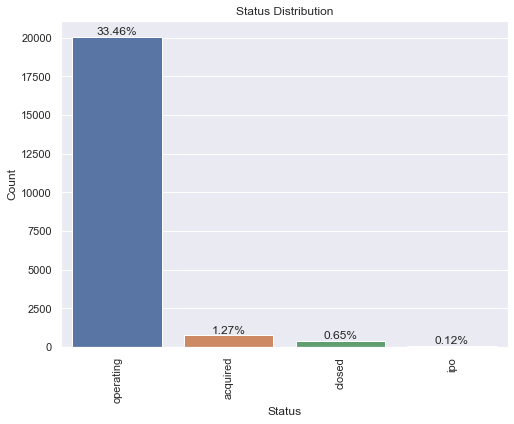

In [254]:
# Percentage of Target variable distribution
plt.figure(figsize=(8, 6))
total = len(company['status'])
ax = sns.countplot(x='status', data=company_fe_1)
plt.title("Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [256]:
# Let's analyse the category_code column
# cat_cols = ['category_code']
# for col in cat_cols:
#     plt.figure(figsize=(8, 10))
#     sns.countplot(data=company_fe_1, y=col)

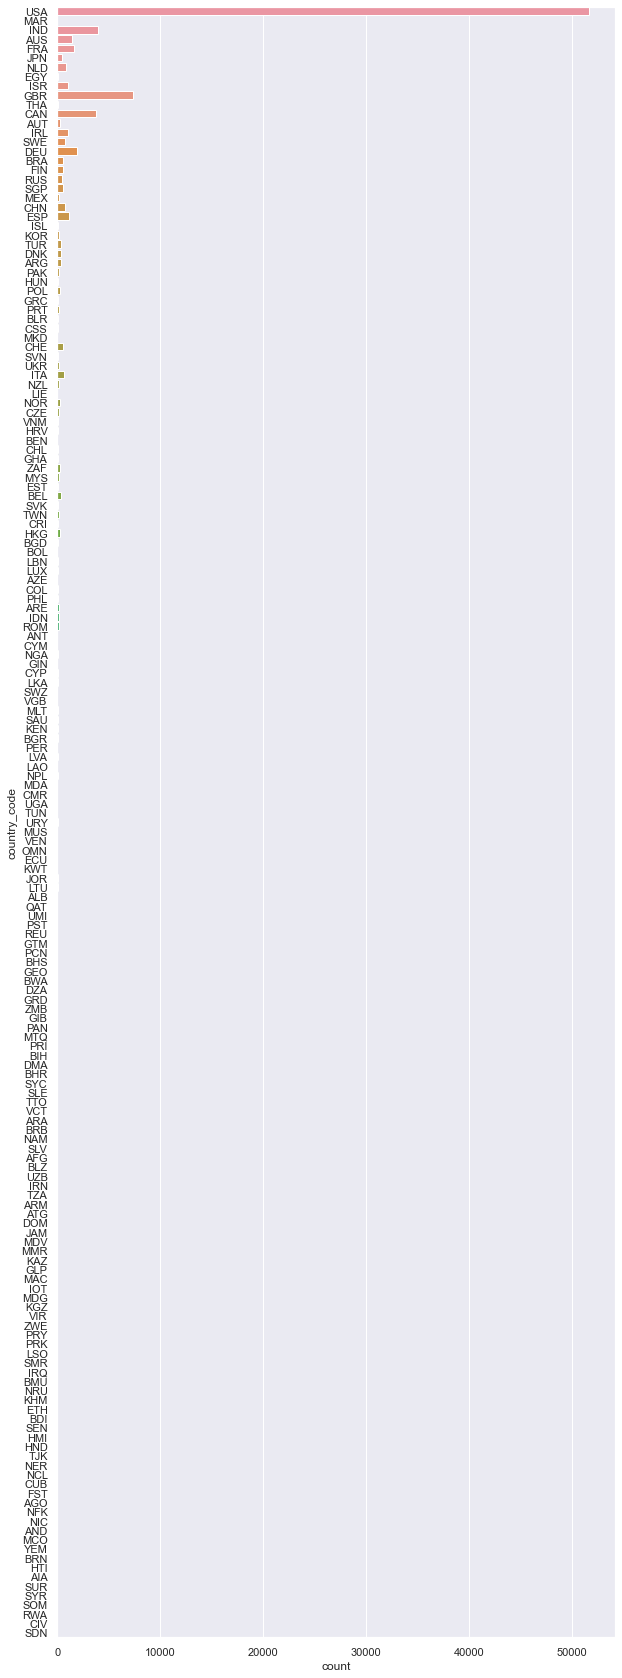

In [257]:
# Let's analyse the country_code column
cat_cols = ['country_code']
for col in cat_cols:
    plt.figure(figsize=(10, 30))
    sns.countplot(data=comp, y=col)

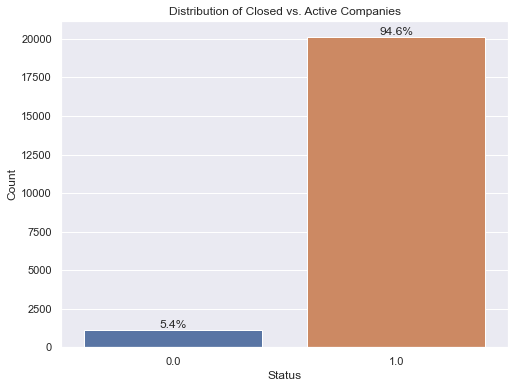

In [258]:
# Distribution of 'isClosed' feature

plt.figure(figsize=(8, 6))

# Countplot
ax = sns.countplot(x='isClosed', data=company_fe_1)

# Title and Labels
plt.title("Distribution of Closed vs. Active Companies")
plt.xlabel("Status")
plt.ylabel("Count")

# Percentage Distribution
total = len(company_fe_1['isClosed'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

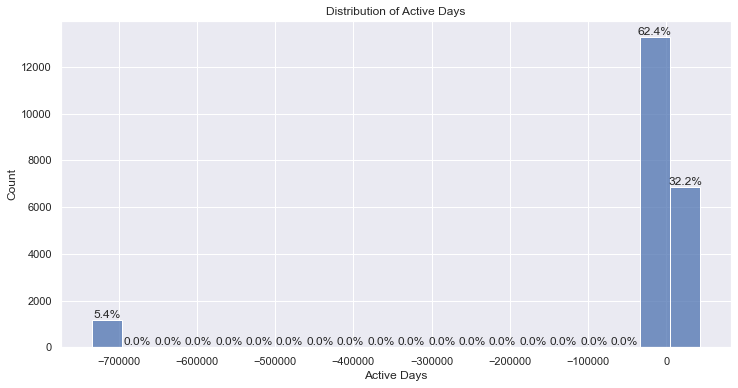

In [259]:
plt.figure(figsize=(12, 6))

# Histogram
ax = sns.histplot(x='active_Days', data=company_fe_1, bins=20)

# Title and Labels
plt.title("Distribution of Active Days")
plt.xlabel("Active Days")
plt.ylabel("Count")

# Percentage Distribution
total = len(company_fe_1['active_Days'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

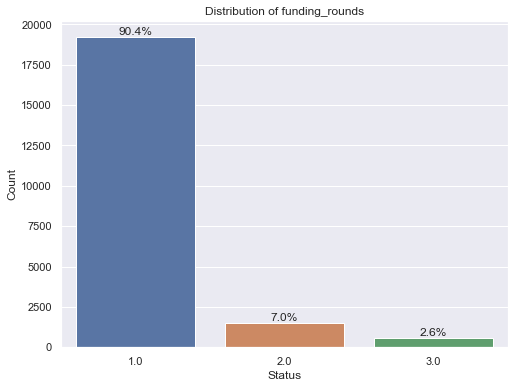

In [260]:
# Distribution of 'funding_rounds' feature

plt.figure(figsize=(8, 6))

# Countplot
ax = sns.countplot(x='funding_rounds', data=company_fe_1)

# Title and Labels
plt.title("Distribution of funding_rounds")
plt.xlabel("Status")
plt.ylabel("Count")

# Percentage Distribution
total = len(company_fe_1['funding_rounds'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

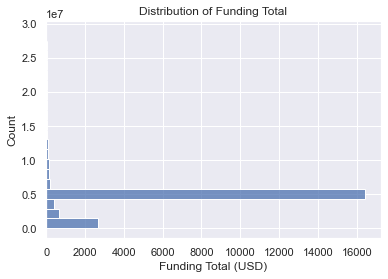

In [261]:
# Distribution of 'funding_total_usd' feature

num_col = ['funding_total_usd']

for col in num_col:
    plt.figure()
    sns.histplot(data=company_fe_1, y=col, bins=20)
    plt.title("Distribution of Funding Total")
    plt.xlabel("Funding Total (USD)")
    plt.ylabel("Count")

plt.show()

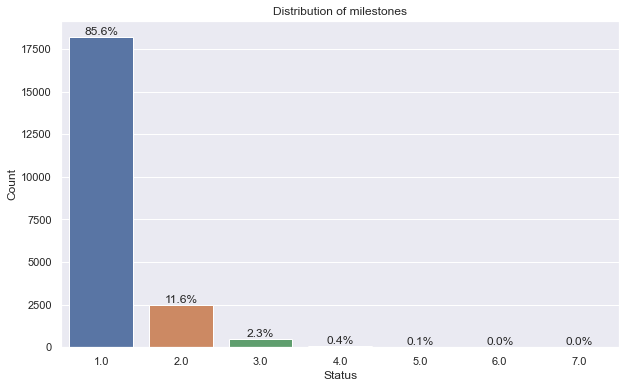

In [262]:
# Distribution of 'milestones' feature

plt.figure(figsize=(10, 6))

# Countplot
ax = sns.countplot(x='milestones', data=company_fe_1)

# Title and Labels
plt.title("Distribution of milestones")
plt.xlabel("Status")
plt.ylabel("Count")

# Percentage Distribution
total = len(company_fe_1['milestones'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

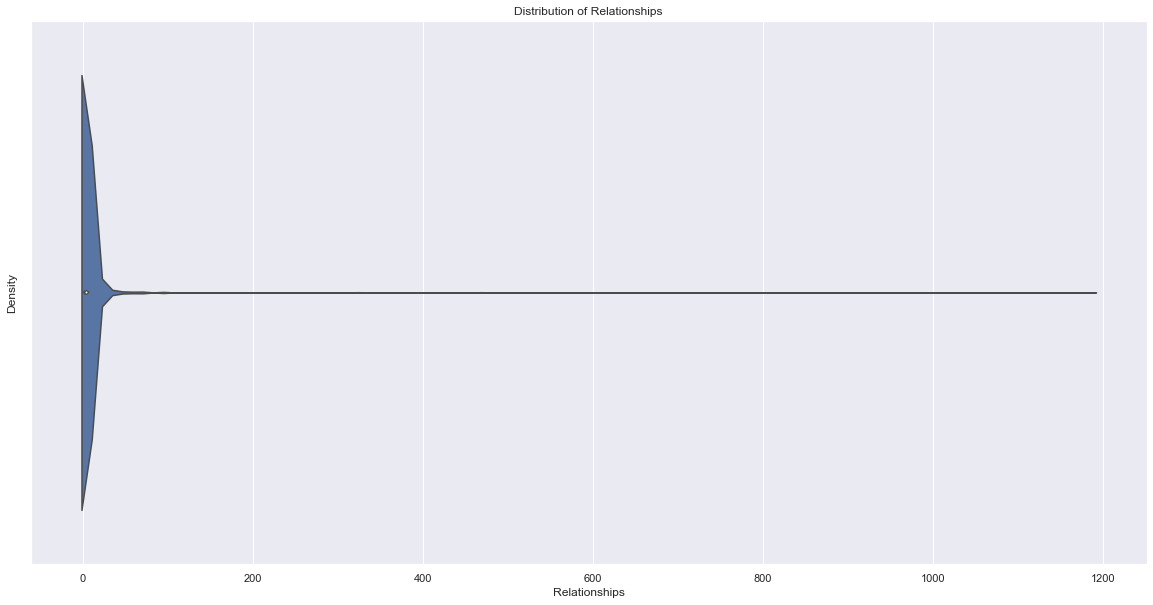

In [263]:
# Distribution of 'relationships' feature
plt.figure(figsize=(20, 10))

# Violin plot
sns.violinplot(data=company_fe_1, x='relationships')

# Title and Labels
plt.title("Distribution of Relationships")
plt.xlabel("Relationships")
plt.ylabel("Density")

plt.show()

### Bivariate Analysis

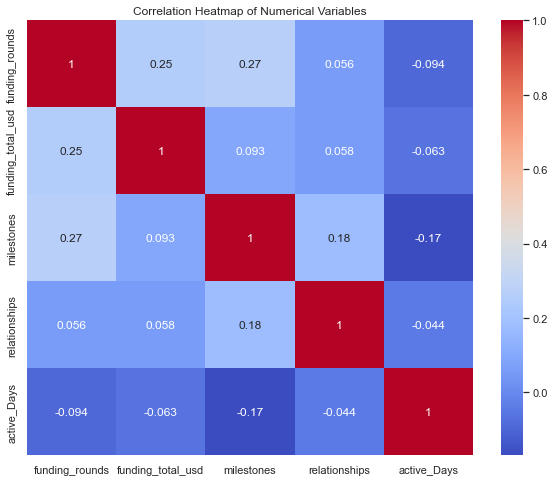

In [264]:
#Explore numerical variables:
numeric_cols = ['funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'active_Days']

plt.figure(figsize=(10, 8))
sns.heatmap(company_fe_1[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


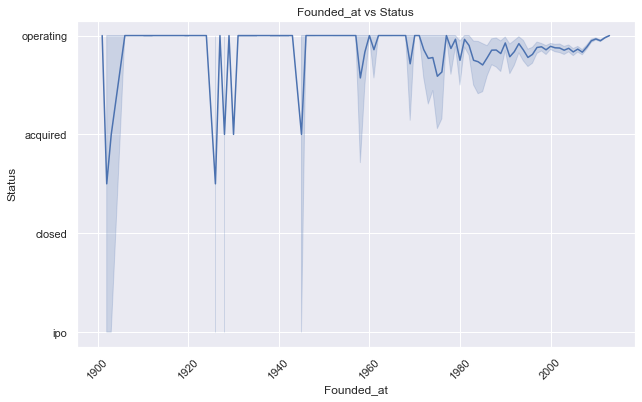

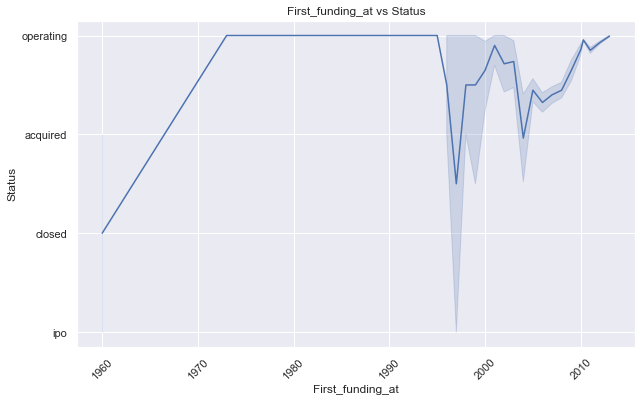

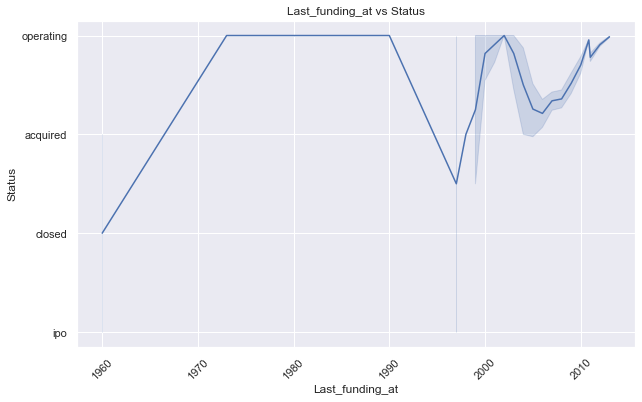

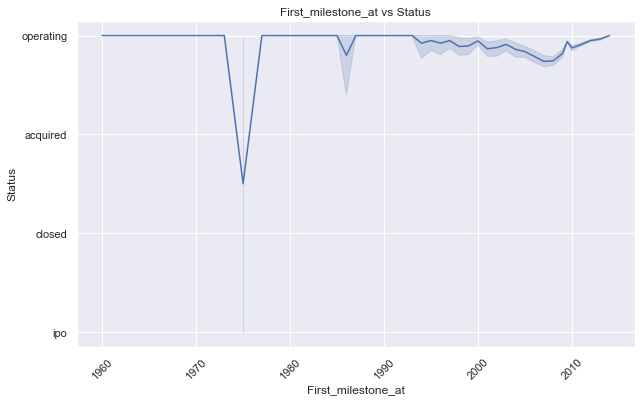

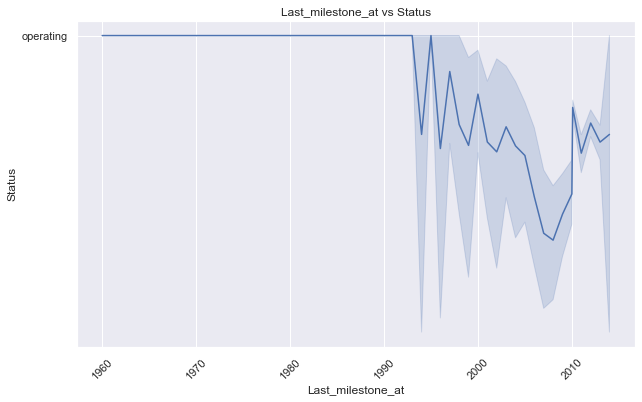

In [265]:
#Analyze time-related columns:
time_cols = ['founded_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']

for col in time_cols:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=company_fe_1, x=col, y='status')
    plt.title(f'{col.capitalize()} vs Status')
    plt.xlabel(col.capitalize())
    plt.ylabel('Status')
    plt.xticks(rotation=45)
    plt.show()


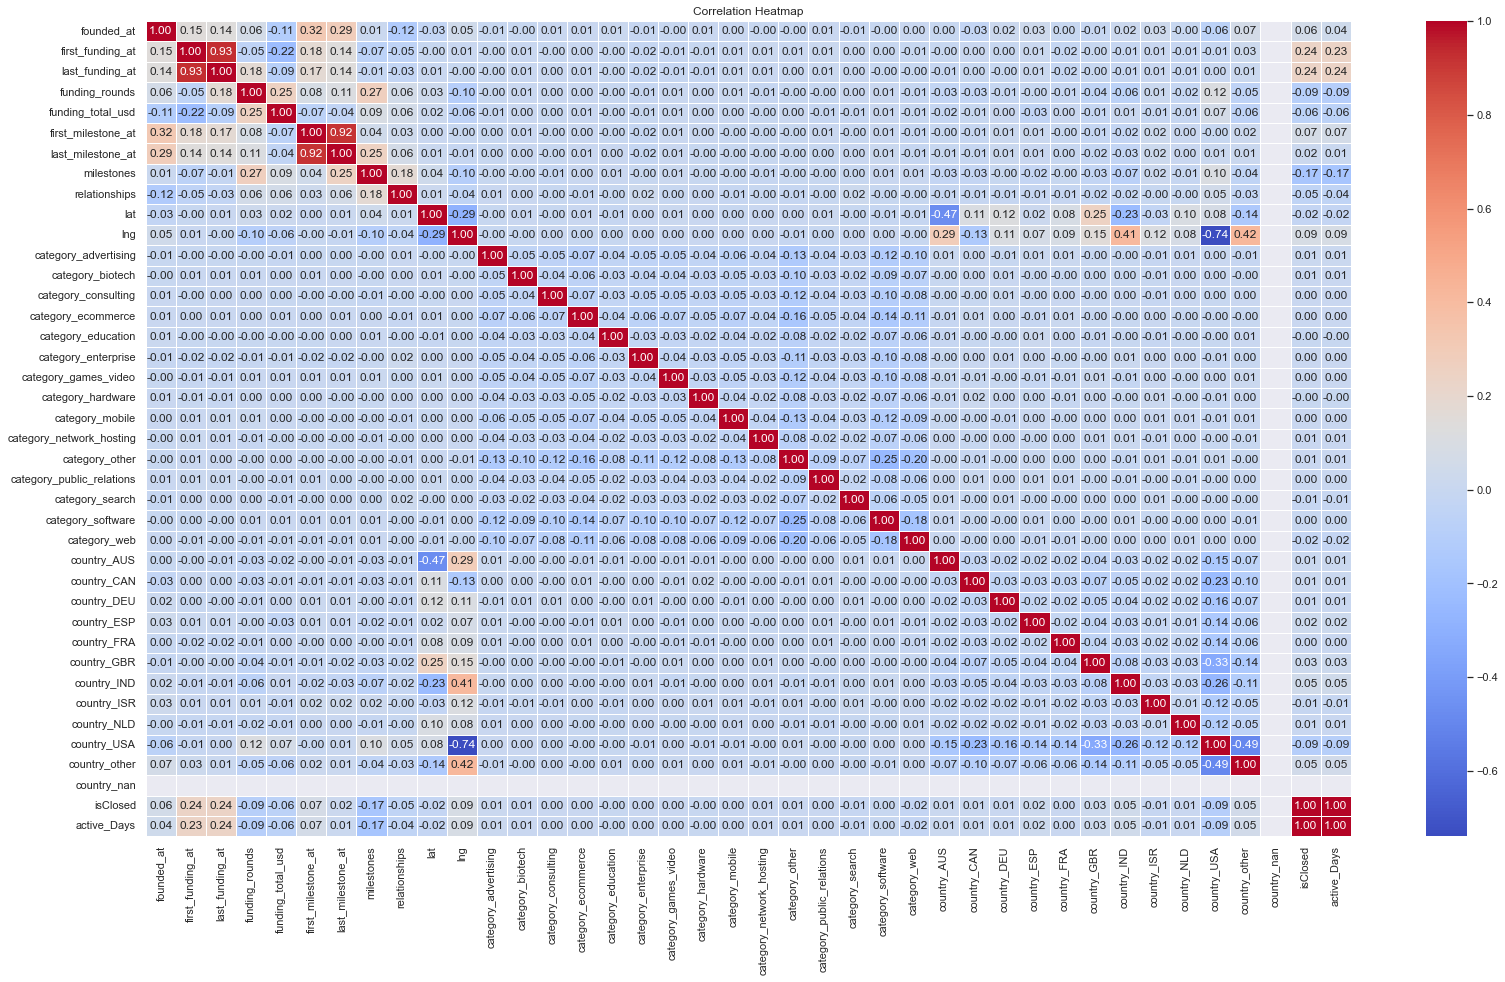

In [266]:
# Correlation heatmap
corr = company_fe_1.corr()
plt.figure(figsize=(27, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

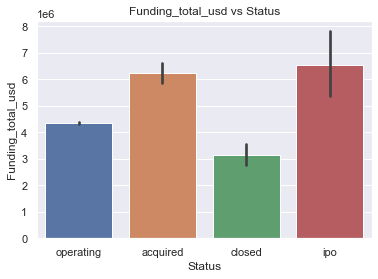

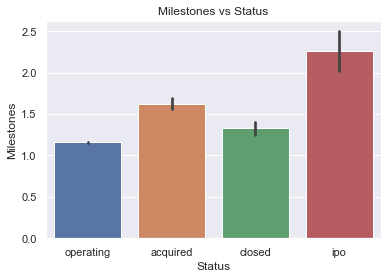

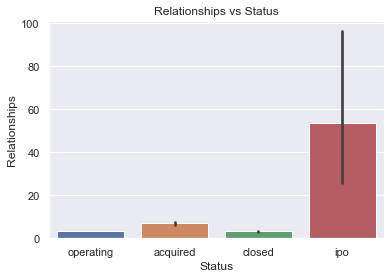

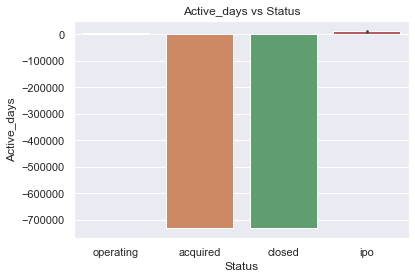

In [267]:
# Analysing the relationship between the below columns with the target variable
strip_col = ['funding_total_usd', 'milestones', 'relationships', 'active_Days']

for col in strip_col:
    plt.figure()
    sns.barplot(data=company_fe_1, x='status', y=col)
    plt.title(f'{col.capitalize()} vs Status')
    plt.xlabel('Status')
    plt.ylabel(col.capitalize())
    plt.show()

In [268]:
company_fe_1.columns

Index(['status', 'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_education', 'category_enterprise',
       'category_games_video', 'category_hardware', 'category_mobile',
       'category_network_hosting', 'category_other',
       'category_public_relations', 'category_search', 'category_software',
       'category_web', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_ISR', 'country_NLD', 'country_USA', 'country_other',
       'country_nan', 'isClosed', 'active_Days'],
      dtype='object')

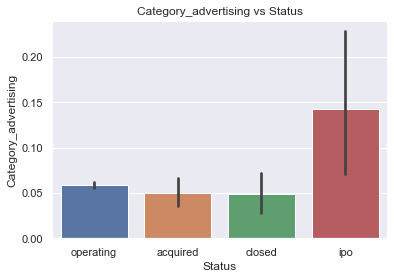

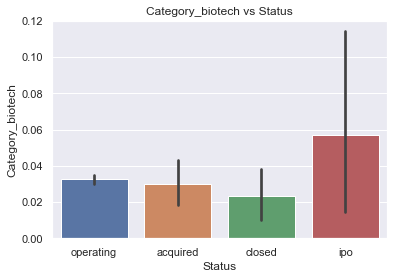

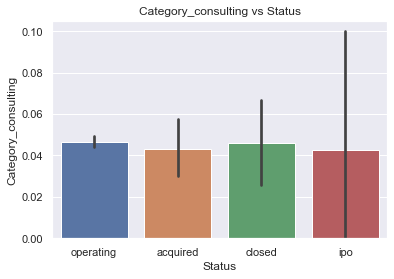

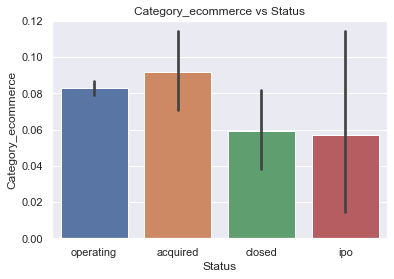

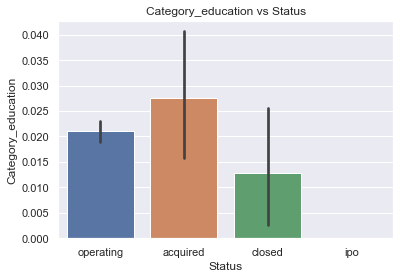

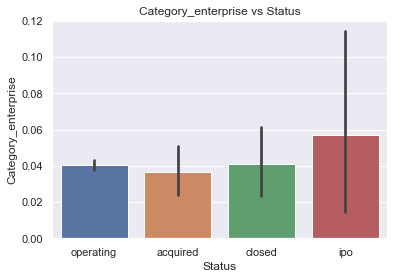

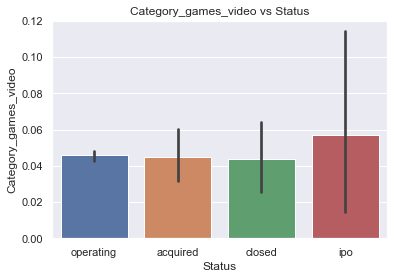

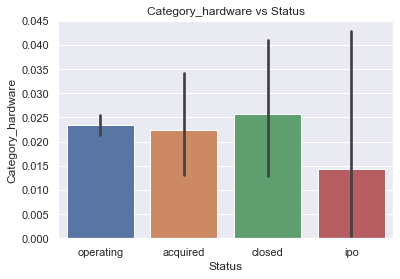

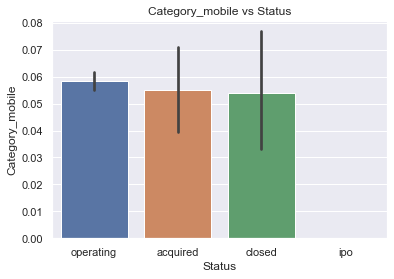

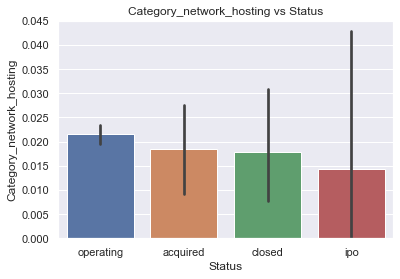

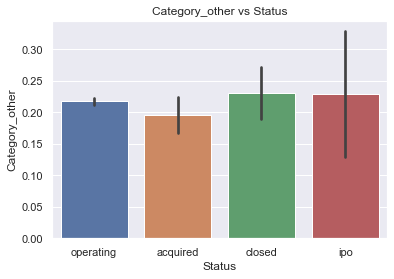

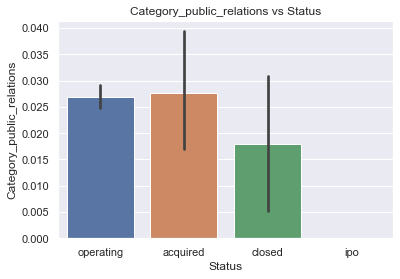

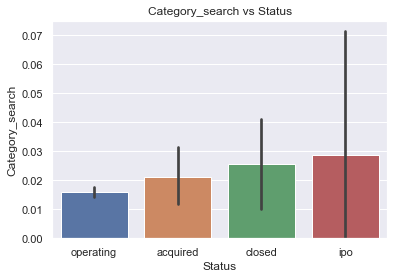

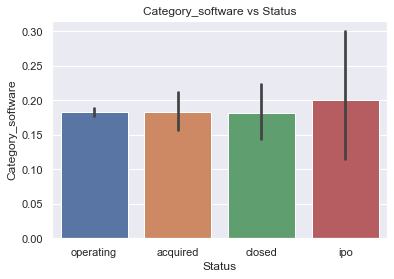

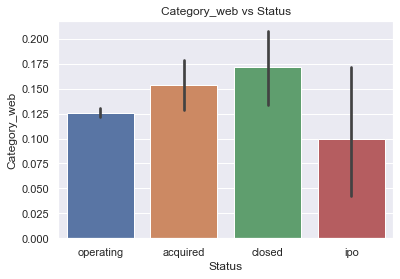

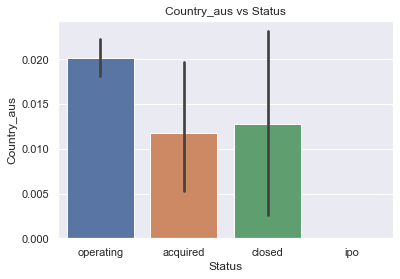

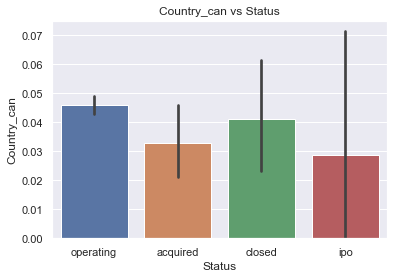

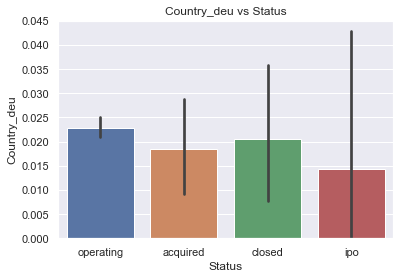

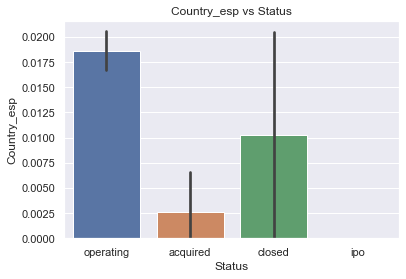

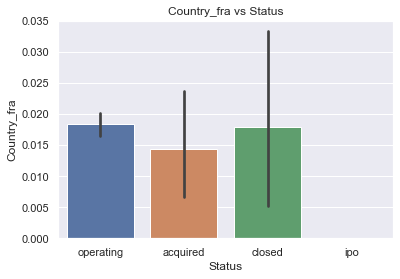

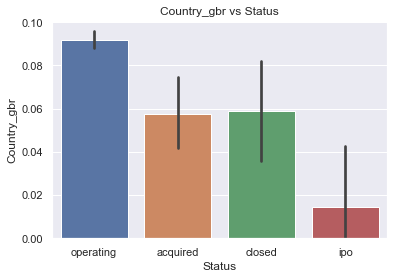

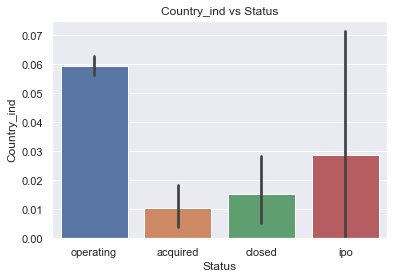

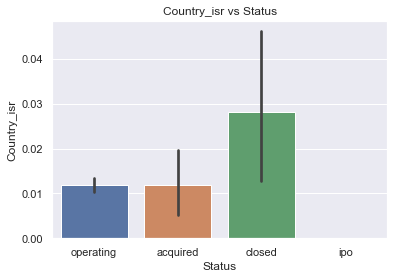

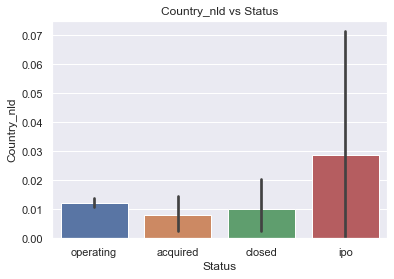

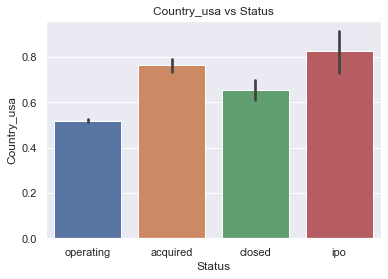

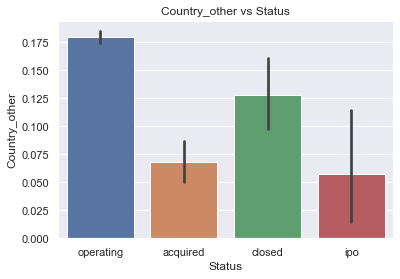

In [269]:
# Analysing the relationship between the below columns with the target variable
strip_col = ['category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_education', 'category_enterprise',
       'category_games_video', 'category_hardware', 'category_mobile',
       'category_network_hosting', 'category_other',
       'category_public_relations', 'category_search', 'category_software',
       'category_web', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_ISR', 'country_NLD', 'country_USA', 'country_other']

for col in strip_col:
    plt.figure()
    sns.barplot(data=company_fe_1, x='status', y=col)
    plt.title(f'{col.capitalize()} vs Status')
    plt.xlabel('Status')
    plt.ylabel(col.capitalize())
    plt.show()

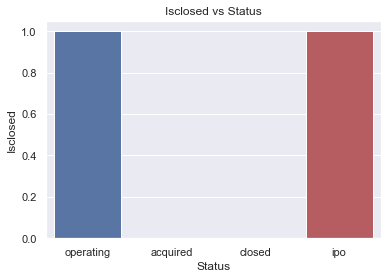

In [270]:
# Analysing the relationship between the below columns with the target variable
strip_col = ['isClosed']

for col in strip_col:
    plt.figure()
    sns.barplot(data=company_fe_1, x='status', y=col)
    plt.title(f'{col.capitalize()} vs Status')
    plt.xlabel('Status')
    plt.ylabel(col.capitalize())
    plt.show()

### Feature Engineering

In [271]:
# Introducing new columns:
company_fe_1['avg_funding_per_round'] = company_fe_1['funding_total_usd'] / company_fe_1['funding_rounds']
company_fe_1['funding_growth_rate'] = (company_fe_1['funding_total_usd'].shift(-1) - company_fe_1['funding_total_usd']) / company_fe_1['funding_total_usd']
company_fe_1['funding_per_round']=company_fe_1['funding_total_usd']/company_fe_1['funding_rounds']
company_fe_1['funding_per_active_days']=company_fe_1['funding_total_usd']/company_fe_1['active_Days']

In [272]:
company_fe_1.columns

Index(['status', 'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_education', 'category_enterprise',
       'category_games_video', 'category_hardware', 'category_mobile',
       'category_network_hosting', 'category_other',
       'category_public_relations', 'category_search', 'category_software',
       'category_web', 'country_AUS', 'country_CAN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IND',
       'country_ISR', 'country_NLD', 'country_USA', 'country_other',
       'country_nan', 'isClosed', 'active_Days', 'avg_funding_per_round',
       'funding_growth_rate', 'funding_per_round', 'funding_per_active_days'],
      dtype='object')

### Finding the most relevant columns

In [273]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer

# Select the columns of object type
object_cols = company_fe_1.select_dtypes(include=["object"]).columns

# Encode the categorical columns using LabelEncoder
company_encoded = company_fe_1.copy()
for col in object_cols:
    company_encoded[col] = pd.factorize(company_encoded[col])[0]

# Separate the feature matrix X and the target variable y
X = company_encoded.drop("status", axis=1)
y = company_encoded["status"]

# Handle missing values in X
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Calculate Mutual Information (MI) scores
mi_scores = mutual_info_classif(X_imputed, y)

# Create a DataFrame to store the MI scores for each feature
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the features by their MI scores in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Select the top-k features with highest MI scores
k = 10  # Number of top features to select
selected_features = mi_scores_df['Feature'][:k].tolist()

# Filter the dataset to retain only the selected features
X_selected = X[selected_features]


In [274]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer

# Select the columns of object type
object_cols = company_fe_1.select_dtypes(include=["object"]).columns

# Encode the categorical columns using LabelEncoder
company_encoded = company_fe_1.copy()
for col in object_cols:
    company_encoded[col] = pd.factorize(company_encoded[col])[0]

# Separate the feature matrix X and the target variable y
X = company_encoded.drop("status", axis=1)
y = company_encoded["status"]

# Handle missing values in X
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Calculate Mutual Information (MI) scores
mi_scores = mutual_info_classif(X_imputed, y)

# Create a DataFrame to store the MI scores for each feature
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the features by their MI scores in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print the top-k features with highest MI scores
k = 20  # Number of top features to display
top_features = mi_scores_df.head(k)['Feature'].tolist()
print("Top Features:")
for feature in top_features:
    print(feature)


Top Features:
funding_per_active_days
active_Days
isClosed
last_funding_at
first_funding_at
founded_at
avg_funding_per_round
funding_per_round
funding_total_usd
relationships
milestones
first_milestone_at
lng
funding_growth_rate
country_USA
lat
last_milestone_at
funding_rounds
country_nan
country_AUS


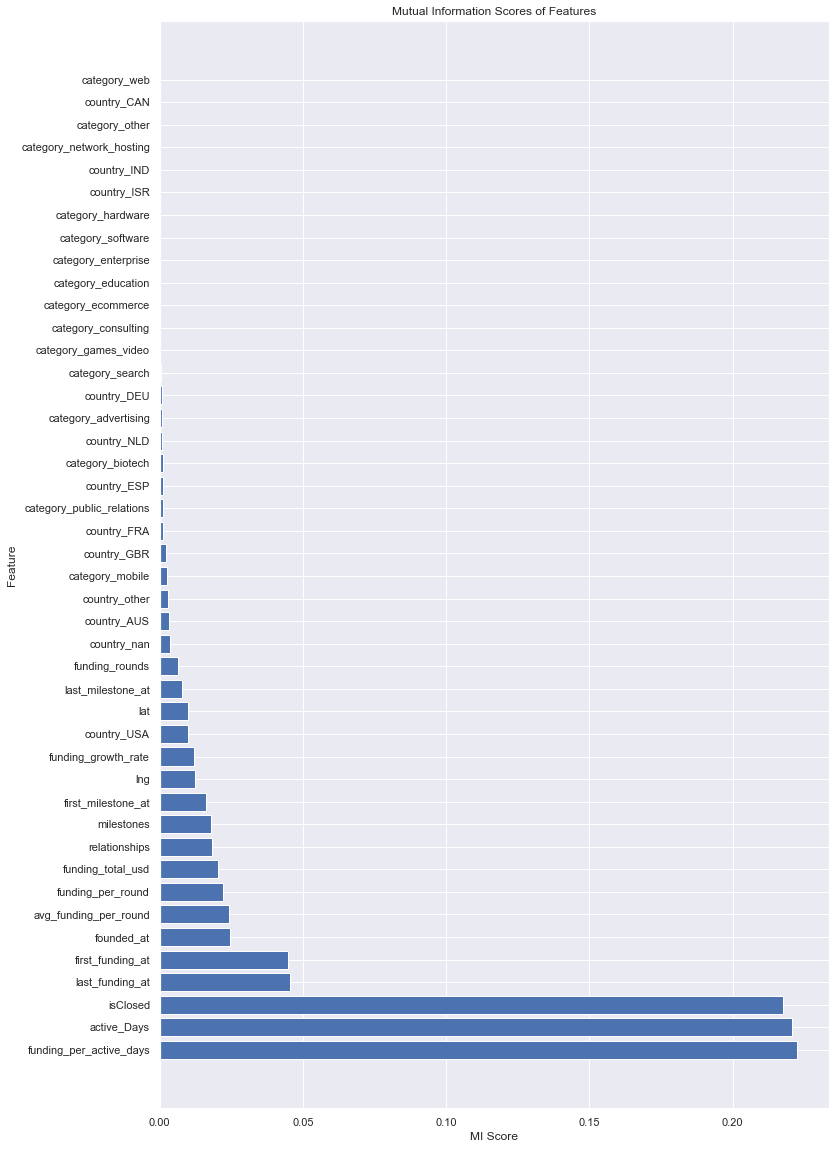

In [275]:
# Plot the MI scores
plt.figure(figsize=(12, 20))
plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'])
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores of Features')
plt.show()

In [276]:
# Delete the irrelevant features
company_fe_1=company_fe_1.drop(['category_network_hosting','category_software','country_CAN','country_ESP','country_FRA','country_GBR',
                                'country_IND','category_public_relations','country_NLD','country_ISR','category_ecommerce',
                                'category_consulting','category_biotech','category_advertising','category_mobile',
                                'category_search','category_education','country_DEU'],axis=1)

In [277]:
company_fe_1.columns

Index(['status', 'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'category_enterprise', 'category_games_video', 'category_hardware',
       'category_other', 'category_web', 'country_AUS', 'country_USA',
       'country_other', 'country_nan', 'isClosed', 'active_Days',
       'avg_funding_per_round', 'funding_growth_rate', 'funding_per_round',
       'funding_per_active_days'],
      dtype='object')

In [278]:
company_fe_1.shape

(21292, 27)

In [279]:
#saving the csv file
company_fe_1.to_csv("EDA_FE.csv")

## Imbalance Column

In [280]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

conditions ={'operating' : 1,'ipo' : 1,'acquired' : 0,'closed':0}

company_fe_1['isOpen'] = company_fe_1['status'].apply(set_value, args = (conditions, ))
company_fe_1.head()

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_USA,country_other,country_nan,isClosed,active_Days,avg_funding_per_round,funding_growth_rate,funding_per_round,funding_per_active_days,isOpen
5,operating,2007.0,2010.275281,2010.838703,1.0,4.561781e+06,2009.506893,2010.083768,1.0,2.0,...,0.0,1.0,0.0,1.0,5110.0,4.561781e+06,0.000000,4.561781e+06,892.716384,1
6,operating,2008.0,2010.275281,2010.838703,1.0,4.561781e+06,2009.506893,2010.083768,1.0,4.0,...,0.0,0.0,0.0,1.0,4745.0,4.561781e+06,0.000000,4.561781e+06,961.386875,1
12,operating,2008.0,2010.275281,2010.838703,1.0,4.561781e+06,2008.000000,2008.000000,1.0,2.0,...,1.0,0.0,0.0,1.0,4745.0,4.561781e+06,0.096063,4.561781e+06,961.386875,1
13,acquired,2007.0,2008.000000,2008.000000,1.0,5.000000e+06,2008.000000,2012.000000,3.0,14.0,...,1.0,0.0,0.0,0.0,-732555.0,5.000000e+06,-0.087644,5.000000e+06,-6.825426,0
15,operating,2008.0,2010.275281,2010.838703,1.0,4.561781e+06,2008.000000,2008.000000,1.0,3.0,...,1.0,0.0,0.0,1.0,4745.0,4.561781e+06,0.000000,4.561781e+06,961.386875,1


In [281]:
company_fe_1['status'].value_counts()

operating    20070
acquired       762
closed         390
ipo             70
Name: status, dtype: int64

In [282]:
company_fe_1.replace({'status': {'operating' : 1, 'ipo' : 1,
                                'acquired' : 0, 'closed' : 0}}, inplace=True)

In [283]:
company_fe_1['status'].value_counts()

1    20140
0     1152
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

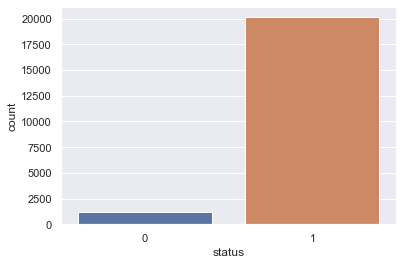

In [284]:
sns.countplot(x=company_fe_1['status'])

In [285]:
# import eli5
import pickle
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import RandomOverSampler, SMOTE
# from eli5.sklearn import PermutationImportance
from pprint import pprint


In [287]:
X = company_fe_1.copy()
y = company_fe_1[['status', 'isClosed', 'active_Days']]
yStatus = X.pop('status')
yClosed = X.pop('isClosed')
yActive = X.pop('active_Days')
X.columns

Index(['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'category_enterprise',
       'category_games_video', 'category_hardware', 'category_other',
       'category_web', 'country_AUS', 'country_USA', 'country_other',
       'country_nan', 'avg_funding_per_round', 'funding_growth_rate',
       'funding_per_round', 'funding_per_active_days', 'isOpen'],
      dtype='object')

In [288]:
X = X[[
    'founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships'
]]
X.columns

Index(['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships'],
      dtype='object')

In [289]:
closed = yClosed.value_counts(); print(closed)
status = yStatus.value_counts(); print(status)

1.0    20140
0.0     1152
Name: isClosed, dtype: int64
1    20140
0     1152
Name: status, dtype: int64


In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

yStatus_train = y_train.iloc[:,0]
yClosed_train = y_train.iloc[:,1]
yActive_train = y_train.iloc[:,2]

yStatus_test = y_test.iloc[:,0]
yClosed_test = y_test.iloc[:,1]
yActive_test = y_test.iloc[:,2]

In [291]:
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=2)

rf = RandomForestClassifier(random_state=0)

### Random Forest

In [292]:
model_rf = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', rf)
])

In [293]:
model_rf.fit(X_train, yStatus_train)
pred = model_rf.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')

test accuracy =  93.99 %


In [294]:
print(classification_report(yClosed_test, pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.389     0.157     0.224       235
         1.0      0.952     0.986     0.969      4024

    accuracy                          0.940      4259
   macro avg      0.671     0.572     0.596      4259
weighted avg      0.921     0.940     0.928      4259



### Gradient Boosting

In [296]:
gb = GradientBoostingClassifier(random_state=42)

model_gb = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', gb)
])

In [297]:
model_gb.fit(X_train, yStatus_train)
pred = model_gb.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')

test accuracy =  94.32 %


In [298]:
print(classification_report(yClosed_test, pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.379     0.047     0.083       235
         1.0      0.947     0.996     0.971      4024

    accuracy                          0.943      4259
   macro avg      0.663     0.521     0.527      4259
weighted avg      0.916     0.943     0.922      4259



### Regularized Logistic Regression

In [299]:
lr = LogisticRegression(random_state=42)

model_lr = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', lr)
])

model_lr.fit(X_train, yStatus_train)
pred = model_lr.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')

test accuracy =  94.41 %


In [300]:
print(classification_report(yClosed_test, pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.448     0.055     0.098       235
         1.0      0.948     0.996     0.971      4024

    accuracy                          0.944      4259
   macro avg      0.698     0.526     0.535      4259
weighted avg      0.920     0.944     0.923      4259



### Neural Network 

In [301]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=42)

model_nn = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', nn)
])

model_nn.fit(X_train, yStatus_train)
pred = model_nn.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')

test accuracy =  94.67 %


In [302]:
print(classification_report(yClosed_test, pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.722     0.055     0.103       235
         1.0      0.948     0.999     0.973      4024

    accuracy                          0.947      4259
   macro avg      0.835     0.527     0.538      4259
weighted avg      0.935     0.947     0.925      4259



### Saving the model 

In [304]:
pickle.dump(model_rf, open('model_rf', 'wb'))
pickle.dump(model_gb, open('model_gb', 'wb'))
pickle.dump(model_lr, open('model_lr', 'wb'))
pickle.dump(model_nn, open('model_nn', 'wb'))